![](https://www.pata.org/wp-content/uploads/2014/09/TripAdvisor_Logo-300x119.png)
# Predict TripAdvisor Rating
## В этом соревновании нам предстоит предсказать рейтинг ресторана в TripAdvisor
**По ходу задачи:**
* Прокачаем работу с pandas
* Научимся работать с Kaggle Notebooks
* Поймем как делать предобработку различных данных
* Научимся работать с пропущенными данными (Nan)
* Познакомимся с различными видами кодирования признаков
* Немного попробуем [Feature Engineering](https://ru.wikipedia.org/wiki/Конструирование_признаков) (генерировать новые признаки)
* И совсем немного затронем ML
* И многое другое...   



### И самое важное, все это вы сможете сделать самостоятельно!

*Этот Ноутбук являетсся Примером/Шаблоном к этому соревнованию (Baseline) и не служит готовым решением!*   
Вы можете использовать его как основу для построения своего решения.

> что такое baseline решение, зачем оно нужно и почему предоставлять baseline к соревнованию стало важным стандартом на kaggle и других площадках.   
**baseline** создается больше как шаблон, где можно посмотреть как происходит обращение с входящими данными и что нужно получить на выходе. При этом МЛ начинка может быть достаточно простой, просто для примера. Это помогает быстрее приступить к самому МЛ, а не тратить ценное время на чисто инженерные задачи. 
Также baseline являеться хорошей опорной точкой по метрике. Если твое решение хуже baseline - ты явно делаешь что-то не то и стоит попробовать другой путь) 

В контексте нашего соревнования baseline идет с небольшими примерами того, что можно делать с данными, и с инструкцией, что делать дальше, чтобы улучшить результат.  Вообще готовым решением это сложно назвать, так как используются всего 2 самых простых признака (а остальные исключаются).

# import

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

import re

# Загружаем специальный удобный инструмент для разделения датасета:
from sklearn.model_selection import train_test_split

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/sf-dst-restaurant-rating/sample_submission.csv
/kaggle/input/sf-dst-restaurant-rating/main_task.csv
/kaggle/input/sf-dst-restaurant-rating/kaggle_task.csv


In [2]:
# всегда фиксируйте RANDOM_SEED, чтобы ваши эксперименты были воспроизводимы!
RANDOM_SEED = 42

In [3]:
# зафиксируем версию пакетов, чтобы эксперименты были воспроизводимы:
!pip freeze > requirements.txt

# DATA

In [4]:
DATA_DIR = '/kaggle/input/sf-dst-restaurant-rating/'
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'kaggle_task.csv')
sample_submission = pd.read_csv(DATA_DIR+'/sample_submission.csv')

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 10 columns):
Restaurant_id        40000 non-null object
City                 40000 non-null object
Cuisine Style        30717 non-null object
Ranking              40000 non-null float64
Rating               40000 non-null float64
Price Range          26114 non-null object
Number of Reviews    37457 non-null float64
Reviews              40000 non-null object
URL_TA               40000 non-null object
ID_TA                40000 non-null object
dtypes: float64(3), object(7)
memory usage: 3.1+ MB


In [6]:
df_train.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Rating,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_5569,Paris,"['European', 'French', 'International']",5570.0,3.5,$$ - $$$,194.0,"[['Good food at your doorstep', 'A good hotel ...",/Restaurant_Review-g187147-d1912643-Reviews-R_...,d1912643
1,id_1535,Stockholm,NaN,1537.0,4.0,NaN,10.0,"[['Unique cuisine', 'Delicious Nepalese food']...",/Restaurant_Review-g189852-d7992032-Reviews-Bu...,d7992032
2,id_352,London,"['Japanese', 'Sushi', 'Asian', 'Grill', 'Veget...",353.0,4.5,$$$$,688.0,"[['Catch up with friends', 'Not exceptional'],...",/Restaurant_Review-g186338-d8632781-Reviews-RO...,d8632781
3,id_3456,Berlin,NaN,3458.0,5.0,NaN,3.0,"[[], []]",/Restaurant_Review-g187323-d1358776-Reviews-Es...,d1358776
4,id_615,Munich,"['German', 'Central European', 'Vegetarian Fri...",621.0,4.0,$$ - $$$,84.0,"[['Best place to try a Bavarian food', 'Nice b...",/Restaurant_Review-g187309-d6864963-Reviews-Au...,d6864963


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
Restaurant_id        10000 non-null object
City                 10000 non-null object
Cuisine Style        7693 non-null object
Ranking              10000 non-null float64
Price Range          6525 non-null object
Number of Reviews    9343 non-null float64
Reviews              9998 non-null object
URL_TA               10000 non-null object
ID_TA                10000 non-null object
dtypes: float64(2), object(7)
memory usage: 703.2+ KB


In [8]:
df_test.head(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA
0,id_0,Paris,"['Bar', 'Pub']",12963.0,$$ - $$$,4.0,"[[], []]",/Restaurant_Review-g187147-d10746918-Reviews-L...,d10746918
1,id_1,Helsinki,"['European', 'Scandinavian', 'Gluten Free Opti...",106.0,$$ - $$$,97.0,"[['Very good reviews!', 'Fine dining in Hakani...",/Restaurant_Review-g189934-d6674944-Reviews-Ra...,d6674944
2,id_2,Edinburgh,['Vegetarian Friendly'],810.0,$$ - $$$,28.0,"[['Better than the Links', 'Ivy Black'], ['12/...",/Restaurant_Review-g186525-d13129638-Reviews-B...,d13129638
3,id_3,London,"['Italian', 'Mediterranean', 'European', 'Vege...",1669.0,$$$$,202.0,"[['Most exquisite', 'Delicious and authentic']...",/Restaurant_Review-g186338-d680417-Reviews-Qui...,d680417
4,id_4,Bratislava,"['Italian', 'Mediterranean', 'European', 'Seaf...",37.0,$$$$,162.0,"[['Always the best in bratislava', 'Very good ...",/Restaurant_Review-g274924-d1112354-Reviews-Ma...,d1112354


In [9]:
sample_submission.head(5)

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0


In [10]:
sample_submission.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
Restaurant_id    10000 non-null object
Rating           10000 non-null float64
dtypes: float64(1), object(1)
memory usage: 156.4+ KB


In [11]:
# ВАЖНО! дря корректной обработки признаков объединяем трейн и тест в один датасет
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


Подробнее по признакам:
* City: Город 
* Cuisine Style: Кухня
* Ranking: Ранг ресторана относительно других ресторанов в этом городе
* Price Range: Цены в ресторане в 3 категориях
* Number of Reviews: Количество отзывов
* Reviews: 2 последних отзыва и даты этих отзывов
* URL_TA: страница ресторана на 'www.tripadvisor.com' 
* ID_TA: ID ресторана в TripAdvisor
* Rating: Рейтинг ресторана

In [13]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,Rating
4653,id_4653,Rome,NaN,4613.0,NaN,47.0,"[[], []]",/Restaurant_Review-g187791-d6733368-Reviews-St...,d6733368,0,0.0
10914,id_12273,London,"['Bar', 'Grill', 'Pub']",12283.0,NaN,2.0,[['Love these basic-traditional-tasty-but-ugl....,/Restaurant_Review-g186338-d1044726-Reviews-To...,d1044726,1,4.5
11233,id_10125,Paris,['French'],10127.0,$$ - $$$,41.0,"[['Great location, amazing service, average f....",/Restaurant_Review-g187147-d3628077-Reviews-La...,d3628077,1,4.0
34582,id_5386,Rome,NaN,5388.0,NaN,4.0,"[[], []]",/Restaurant_Review-g187791-d5872669-Reviews-Ve...,d5872669,1,5.0
41408,id_14627,London,['Mediterranean'],14638.0,$,2.0,"[['The food', ""I don't know if this place is u...",/Restaurant_Review-g186338-d11956623-Reviews-F...,d11956623,1,3.0


In [14]:
data.Reviews[1]

"[['Very good reviews!', 'Fine dining in Hakaniemi'], ['12/05/2017', '10/29/2017']]"

Как видим, большинство признаков у нас требует очистки и предварительной обработки.

# Cleaning and Prepping Data
Обычно данные содержат в себе кучу мусора, который необходимо почистить, для того чтобы привести их в приемлемый формат. Чистка данных — это необходимый этап решения почти любой реальной задачи.   
![](https://analyticsindiamag.com/wp-content/uploads/2018/01/data-cleaning.png)

## 1. Обработка NAN 
У наличия пропусков могут быть разные причины, но пропуски нужно либо заполнить, либо исключить из набора полностью. Но с пропусками нужно быть внимательным, **даже отсутствие информации может быть важным признаком!**   
По этому перед обработкой NAN лучше вынести информацию о наличии пропуска как отдельный признак

In [15]:
# оценим количество пропусков в данных
data.isna().mean()

Restaurant_id        0.00000
City                 0.00000
Cuisine Style        0.23180
Ranking              0.00000
Price Range          0.34722
Number of Reviews    0.06400
Reviews              0.00004
URL_TA               0.00000
ID_TA                0.00000
sample               0.00000
Rating               0.00000
dtype: float64

### "Number of Reviews"

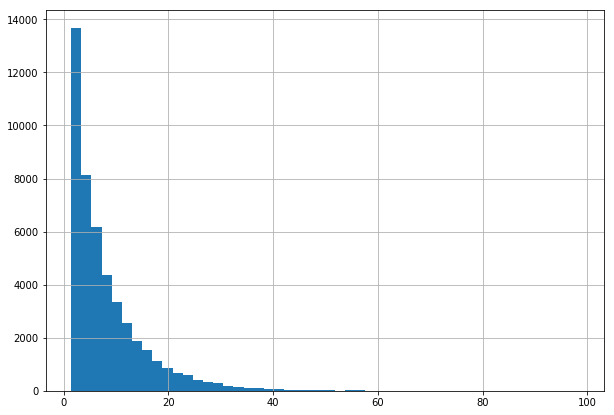

In [16]:
plt.rcParams['figure.figsize'] = (10,7)
(data['Number of Reviews']**0.5).hist(bins=50)

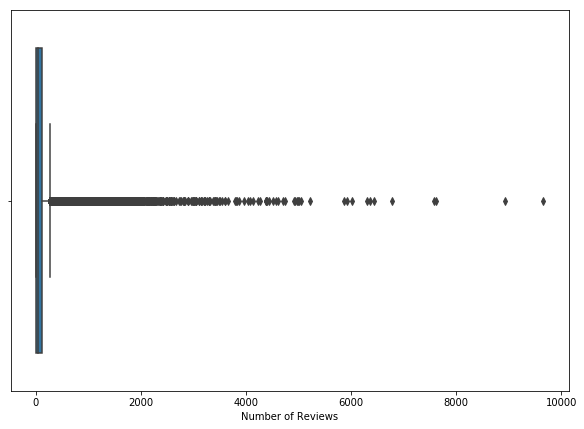

In [17]:
plt.rcParams['figure.figsize'] = (10,7)
sns.boxplot(data['Number of Reviews'])

Признак показывает большую вариативность с наличием большого количества выбросов.
Однако это может нести полезную информацию. 

In [18]:
# Далее заполняем пропуски 0, вы можете попробовать заполнением средним или средним по городу и тд...
# Заполним пропуски модой, так как мода показывает лучший результат
data['Number of Reviews'].fillna(data['Number of Reviews'].mode()[0], inplace=True)

### 'Reviews'

Данный признак содержит 41857 уникальных значений.
Из признака можно извлечь полезные данные в виде даты отзывов

In [19]:
data['Reviews'].nunique()

41857

In [20]:
print(f"{data['Reviews'].value_counts().index[0]} = {data['Reviews'].value_counts()[0]}")

[[], []] = 8112


In [21]:
# Заполняем пропуски значением "unknown" - так как большинство значений уникальны или не несут никакой информации
data['Reviews'].fillna('unknown',inplace=True)

### 'Price Range'

'Price Range' это - категориальный принак.
Учитывая, что он отображает уровень цен, есть возможность преобразовать его в числовое значение.

In [22]:
# Находим самый часто встречающийся ценовой диапозон по различным городам
cites = list(data['City'].unique())
city_dic = {}
for city in cites:
  city_dic[city] = data[data['City'] == city]['Price Range'].mode()[0]
city_dic

{'Paris': '$$ - $$$',
 'Helsinki': '$$ - $$$',
 'Edinburgh': '$$ - $$$',
 'London': '$$ - $$$',
 'Bratislava': '$$ - $$$',
 'Lisbon': '$$ - $$$',
 'Budapest': '$$ - $$$',
 'Stockholm': '$$ - $$$',
 'Rome': '$$ - $$$',
 'Milan': '$$ - $$$',
 'Munich': '$$ - $$$',
 'Hamburg': '$$ - $$$',
 'Prague': '$$ - $$$',
 'Vienna': '$$ - $$$',
 'Dublin': '$$ - $$$',
 'Barcelona': '$$ - $$$',
 'Brussels': '$$ - $$$',
 'Madrid': '$$ - $$$',
 'Oslo': '$$ - $$$',
 'Amsterdam': '$$ - $$$',
 'Berlin': '$$ - $$$',
 'Lyon': '$$ - $$$',
 'Athens': '$$ - $$$',
 'Warsaw': '$$ - $$$',
 'Oporto': '$$ - $$$',
 'Krakow': '$$ - $$$',
 'Copenhagen': '$$ - $$$',
 'Luxembourg': '$$ - $$$',
 'Zurich': '$$ - $$$',
 'Geneva': '$$ - $$$',
 'Ljubljana': '$$ - $$$'}

In [23]:
# Заполняем пропуски самым часто встречающимся значением
data['Price Range'].fillna('$$ - $$$', inplace=True)

### 'Cuisine Style'

In [24]:
data['Cuisine Style'].nunique()

10731

In [25]:
# признак содержит большое количесво уникальных значений
# заполним пропуски значением 'unknown'
data['Cuisine Style'].fillna('unknown', inplace=True)

In [26]:
# Пропуски заполнены
data.isna().mean()

Restaurant_id        0.0
City                 0.0
Cuisine Style        0.0
Ranking              0.0
Price Range          0.0
Number of Reviews    0.0
Reviews              0.0
URL_TA               0.0
ID_TA                0.0
sample               0.0
Rating               0.0
dtype: float64

### 2. Обработка признаков
Для начала посмотрим какие признаки у нас могут быть категориальными.

In [27]:
data.nunique(dropna=False)

Restaurant_id        13094
City                    31
Cuisine Style        10732
Ranking              12975
Price Range              3
Number of Reviews     1573
Reviews              41858
URL_TA               49963
ID_TA                49963
sample                   2
Rating                  10
dtype: int64

Какие признаки можно считать категориальными?

Для кодирования категориальных признаков есть множество подходов:
* Label Encoding
* One-Hot Encoding
* Target Encoding
* Hashing

Выбор кодирования зависит от признака и выбраной модели.
Не будем сейчас сильно погружаться в эту тематику, давайте посмотрим лучше пример с One-Hot Encoding:
![](https://i.imgur.com/mtimFxh.png)

### " City"

In [28]:
data['City'].nunique()

31

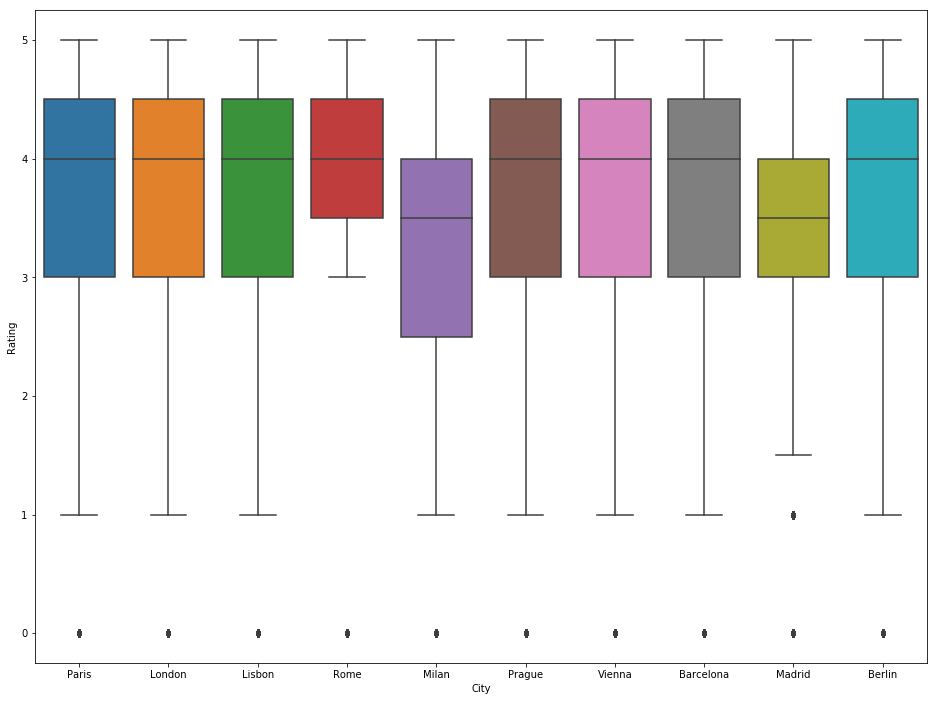

In [29]:
plt.figure(figsize=(16,12))
sns.boxplot(x = 'City', y = 'Rating', data= data[data.City.isin(df_train['City'].value_counts()[0:10].index)])

Признак содержит 31 уникальное категориальное значение.
Имеется различие в распределения рейтинга в зависимости от значения переменной.
Для кодирования признака можно применить One-Hot Encoding.

In [30]:
# для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
data = pd.concat([data,pd.get_dummies(data['City'])],axis=1)

In [31]:
data.sample(5)

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Munich,Oporto,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich
42882,id_15954,London,"['Bar', 'Pub']",15966.0,$$ - $$$,8.0,"[[""Cheap and dank, but that's what we came fo....",/Restaurant_Review-g186338-d1907335-Reviews-So...,d1907335,1,...,0,0,0,0,0,0,0,0,0,0
29215,id_1733,Copenhagen,"['Chinese', 'Sushi']",1738.0,$$ - $$$,35.0,"[['Pleasantly Surprised', 'Buffet'], ['05/02/2...",/Restaurant_Review-g189541-d1186567-Reviews-Ki...,d1186567,1,...,0,0,0,0,0,0,0,0,0,0
22799,id_13165,London,"['Chinese', 'Asian', 'Vegetarian Friendly']",13175.0,$$ - $$$,18.0,"[['Not your usual Chinese', 'A high end takeaw...",/Restaurant_Review-g186338-d12674803-Reviews-Z...,d12674803,1,...,0,0,0,0,0,0,0,0,0,0
41398,id_329,Ljubljana,"['European', 'Slovenian']",330.0,$$ - $$$,3.0,"[['Great sunset!', 'Great place'], ['06/13/201...",/Restaurant_Review-g274873-d5532415-Reviews-AL...,d5532415,1,...,0,0,0,0,0,0,0,0,0,0
16927,id_133,Prague,"['Eastern European', 'Central European']",134.0,$,1659.0,"[['Good value Czech food and beer', 'Good food...",/Restaurant_Review-g274707-d787784-Reviews-Res...,d787784,1,...,0,0,0,0,1,0,0,0,0,0


#### Возьмем следующий признак "Price Range".

In [32]:
data['Price Range'].value_counts()

$$ - $$$    40402
$            7816
$$$$         1782
Name: Price Range, dtype: int64

По описанию 'Price Range' это - Цены в ресторане.  
Их можно поставить по возрастанию (значит это не категориальный признак). А это значит, что их можно заменить последовательными числами, например 1,2,3  
*Попробуйте сделать обработку этого признака уже самостоятельно!*

In [33]:
# Ваша обработка 'Price Range'
# Заменим уровень цен последовательными цифрами
# One-Hot Encoding показала несколько худший результат
def chng_price(price):
    if price == '$':
        return 1
    elif price == '$$ - $$$':
        return 2
    else:
        return 3

In [34]:
data['Price Range'] = data['Price Range'].apply(chng_price)

> Для некоторых алгоритмов МЛ даже для не категориальных признаков можно применить One-Hot Encoding, и это может улучшить качество модели. Пробуйте разные подходы к кодированию признака - никто не знает заранее, что может взлететь.

### Обработать другие признаки вы должны самостоятельно!
Для обработки других признаков вам возможно придется даже написать свою функцию, а может даже и не одну, но в этом и есть ваша практика в этом модуле!     
Следуя подсказкам в модуле вы сможете более подробно узнать, как сделать эти приобразования.

### 'Cuisine Style'

In [35]:
data['Cuisine Style'][1]

"['European', 'Scandinavian', 'Gluten Free Options', 'Vegetarian Friendly', 'Vegan Options']"

In [36]:
# тут ваш код на обработку других признаков
# .....
# преобразуем набор кухонь в рестораннах в list. После чего сгенерируем новый признак дата фрейма в виде количества кухонь в ресторане
data['Cuisine Style'] = data['Cuisine Style'].astype(str).apply(lambda L: L[1:-1])
data['Cuisine Style'] = data['Cuisine Style'].str.split(',')
data['Cuisine Style'] = data['Cuisine Style'].astype(str).str.strip()
data['n_cuisine'] = data['Cuisine Style'].apply(len)

### 'Reviews'

In [37]:
data['Reviews'].nunique()

41858

In [38]:
# Данный принак содержит 41858 уникальных значений
# Но из него можго извлечь дату создания отзывов и преобразовать ее в datetime формат
# После чего можно сформировать новый признак, как разницу во времени между отзывами
pattern = re.compile('\'\d+\/\d+\/\d+\'?')
data['Reviews Date'] = data['Reviews'].apply(pattern.findall)
data['Reviews Date'] = data['Reviews Date'].apply(lambda x: sorted([pd.to_datetime(i).date() for i in x]))
data['Reviews Date']

0                              []
1        [2017-10-29, 2017-12-05]
2        [2017-12-06, 2017-12-28]
3        [2017-11-22, 2017-12-06]
4        [2018-01-24, 2018-02-08]
                   ...           
49995    [2017-11-12, 2017-12-16]
49996    [2017-12-12, 2017-12-21]
49997    [2008-04-12, 2016-11-03]
49998    [2017-06-18, 2017-07-11]
49999    [2012-07-04, 2016-01-31]
Name: Reviews Date, Length: 50000, dtype: object

In [39]:
# возвращает даты отзывов из 'Reviews Date'
def get_date(row):
    if len(row['Reviews Date']) == 2:
        return row['Reviews Date'][0], row['Reviews Date'][1]
    elif len(row['Reviews Date']) == 1:
        return row['Reviews Date'][0], np.nan
    else:
        return np.nan,np.nan

In [40]:
# создаем столбцы в которых хранятся даты отзывов 
data[['date_1', 'date_2']] = data[['Reviews Date']].apply(get_date, axis=1, result_type='expand')
data[['date_1', 'date_2']][:20]

,date_1,date_2
0,NaN,NaN
1,2017-10-29,2017-12-05
2,2017-12-06,2017-12-28
3,2017-11-22,2017-12-06
4,2018-01-24,2018-02-08
5,2017-09-02,2017-09-07
6,NaN,NaN
7,NaN,NaN
8,2017-10-11,2018-01-07
9,2017-10-29,2017-12-02


In [41]:
# создаем новый признак, как разницу во времени между отзывами
# заполняем пропуски средним значение времени между отзывами
# и преобразуем в int
data['time_delta'] = data.date_2 - data.date_1
data['time_delta'].fillna(data['time_delta'].mean(), inplace=True)
data['time_delta'] = data['time_delta'].astype('timedelta64[D]').astype(int)

In [42]:
data.sample()

,Restaurant_id,City,Cuisine Style,Ranking,Price Range,Number of Reviews,Reviews,URL_TA,ID_TA,sample,...,Rome,Stockholm,Vienna,Warsaw,Zurich,n_cuisine,Reviews Date,date_1,date_2,time_delta
32503,id_2807,Barcelona,['nknow'],2808.0,2,14.0,"[['Genuine style', 'Best restaurant in this ar...",/Restaurant_Review-g187497-d5865184-Reviews-La...,d5865184,1,...,0,0,0,0,0,9,"[2016-11-21, 2017-06-26]",2016-11-21,2017-06-26,217


![](https://cs10.pikabu.ru/post_img/2018/09/06/11/1536261023140110012.jpg)

# EDA 
[Exploratory Data Analysis](https://ru.wikipedia.org/wiki/Разведочный_анализ_данных) - Анализ данных
На этом этапе мы строим графики, ищем закономерности, аномалии, выбросы или связи между признаками.
В общем цель этого этапа понять, что эти данные могут нам дать и как признаки могут быть взаимосвязаны между собой.
Понимание изначальных признаков позволит сгенерировать новые, более сильные и, тем самым, сделать нашу модель лучше.
![](https://miro.medium.com/max/2598/1*RXdMb7Uk6mGqWqPguHULaQ.png)

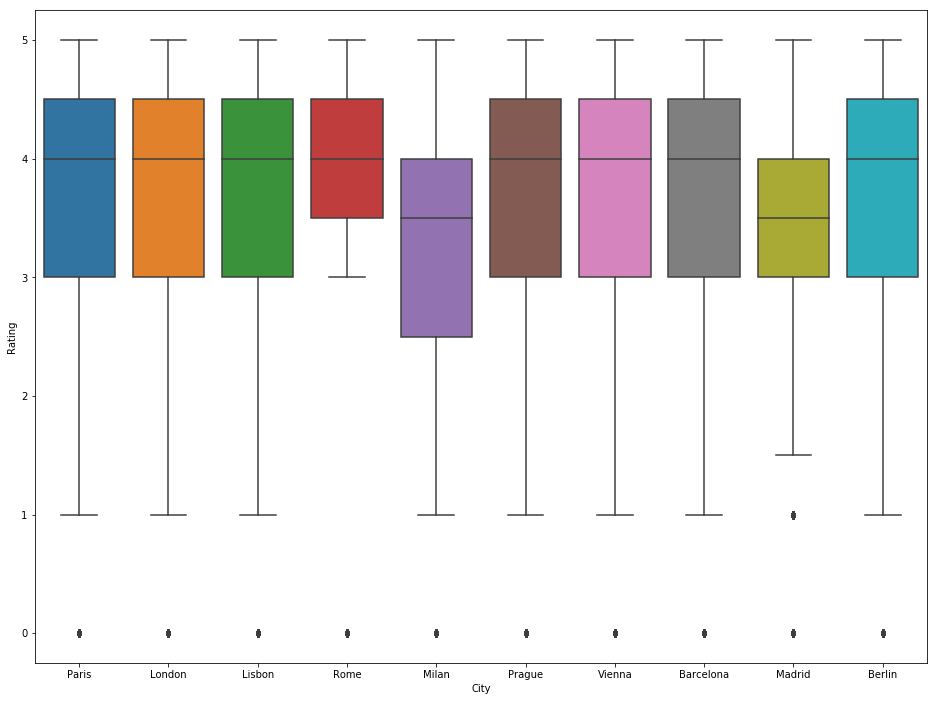

In [43]:
plt.figure(figsize=(16,12))
sns.boxplot(x = 'City', y = 'Rating', data= data[data.City.isin(df_train['City'].value_counts()[0:10].index)])

 Имеется различие в распределения рейтинга в зависимости от значения переменной "City". Для кодирования признака можно применить One-Hot Encoding.

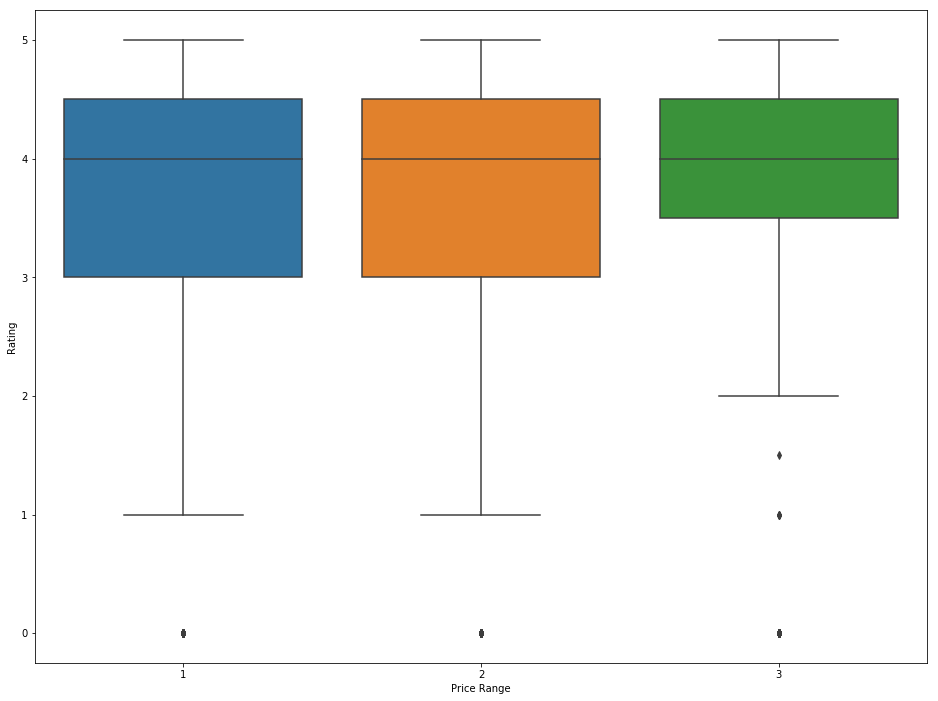

In [44]:
plt.figure(figsize=(16,12))
sns.boxplot(x = 'Price Range', y = 'Rating', data= data)

 Малое различие в распределения рейтинга в зависимости от значения переменной 'Price Range'.

### Посмотрим распределение признака

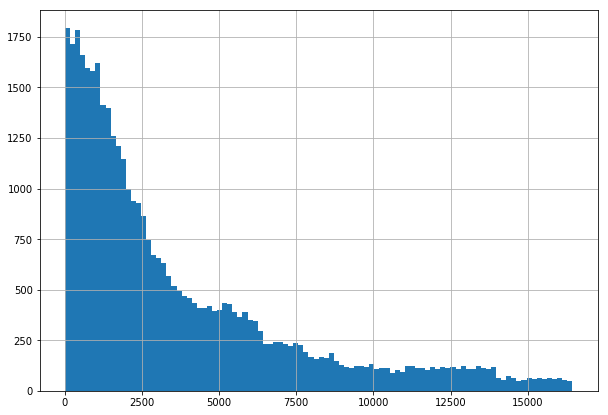

In [45]:
plt.rcParams['figure.figsize'] = (10,7)
df_train['Ranking'].hist(bins=100)

У нас много ресторанов, которые не дотягивают и до 2500 места в своем городе, а что там по городам?

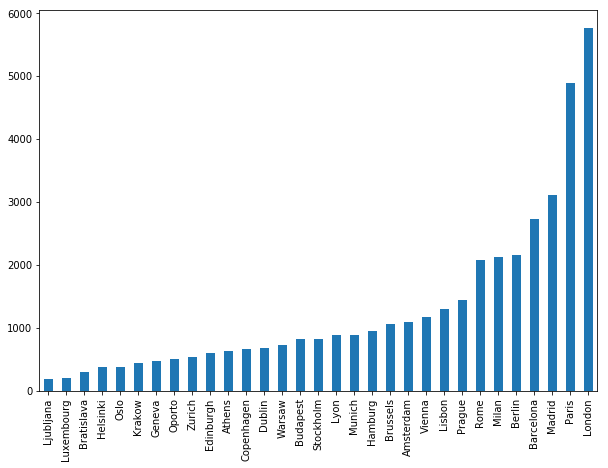

In [46]:
df_train['City'].value_counts(ascending=True).plot(kind='bar')

А кто-то говорил, что французы любят поесть=) Посмотрим, как изменится распределение в большом городе:

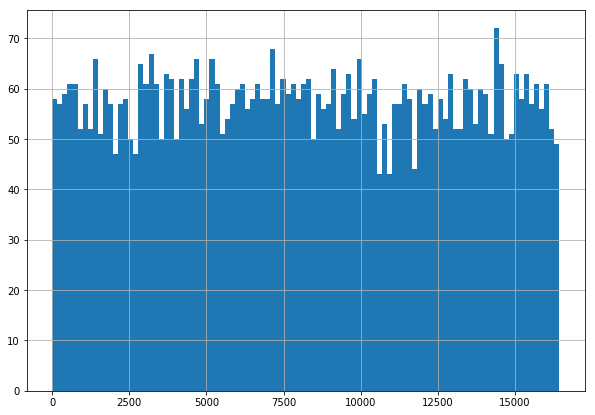

In [47]:
df_train['Ranking'][df_train['City'] =='London'].hist(bins=100)

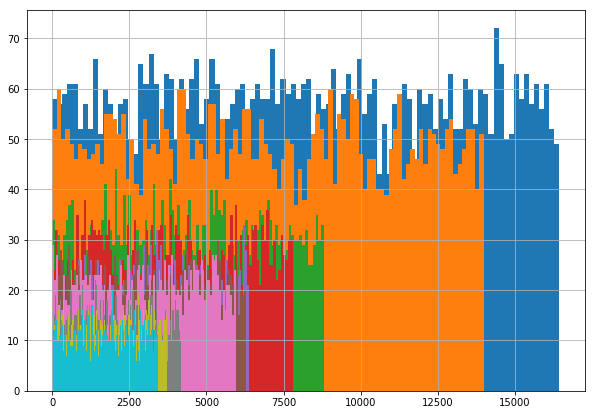

In [48]:
# посмотрим на топ 10 городов
for x in (df_train['City'].value_counts())[0:10].index:
    df_train['Ranking'][df_train['City'] == x].hist(bins=100)
plt.show()

Получается, что Ranking имеет нормальное распределение, просто в больших городах больше ресторанов, из-за мы этого имеем смещение.

>Подумайте как из этого можно сделать признак для вашей модели. Я покажу вам пример, как визуализация помогает находить взаимосвязи. А далее действуйте без подсказок =)

### Посмотрим распределение целевой переменной

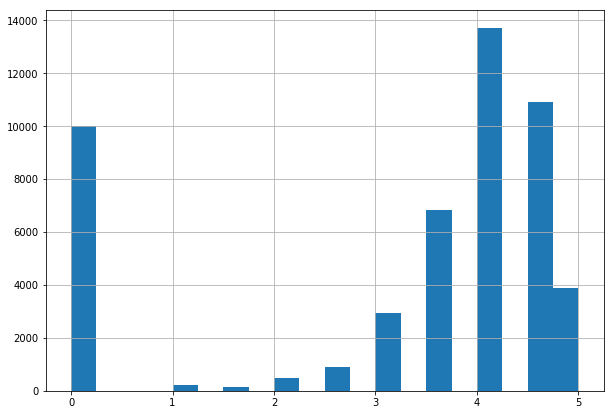

In [49]:
data['Rating'].hist(bins=20)

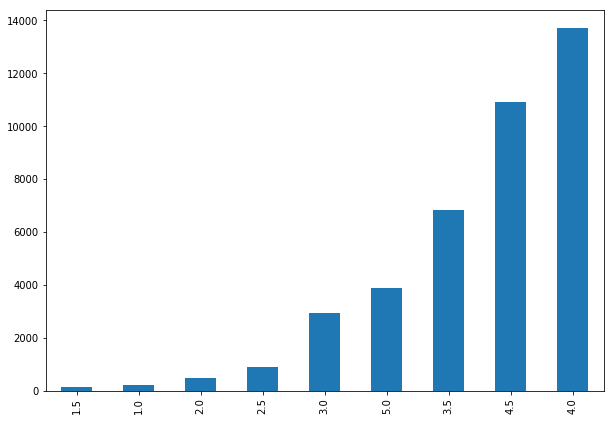

In [50]:
df_train['Rating'].value_counts(ascending=True).plot(kind='bar')

### Посмотрим распределение целевой переменной относительно признака

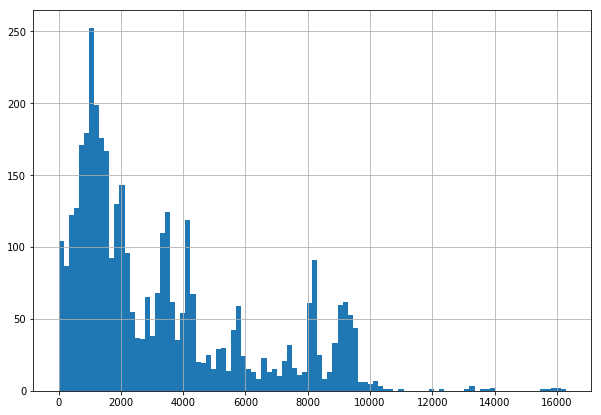

In [51]:
df_train['Ranking'][df_train['Rating'] == 5].hist(bins=100)

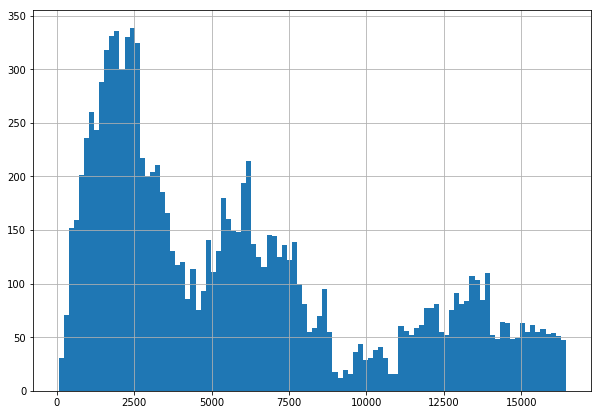

In [52]:
df_train['Ranking'][df_train['Rating'] < 4].hist(bins=100)

### И один из моих любимых - [корреляция признаков](https://ru.wikipedia.org/wiki/Корреляция)
На этом графике уже сейчас вы сможете заметить, как признаки связаны между собой и с целевой переменной.

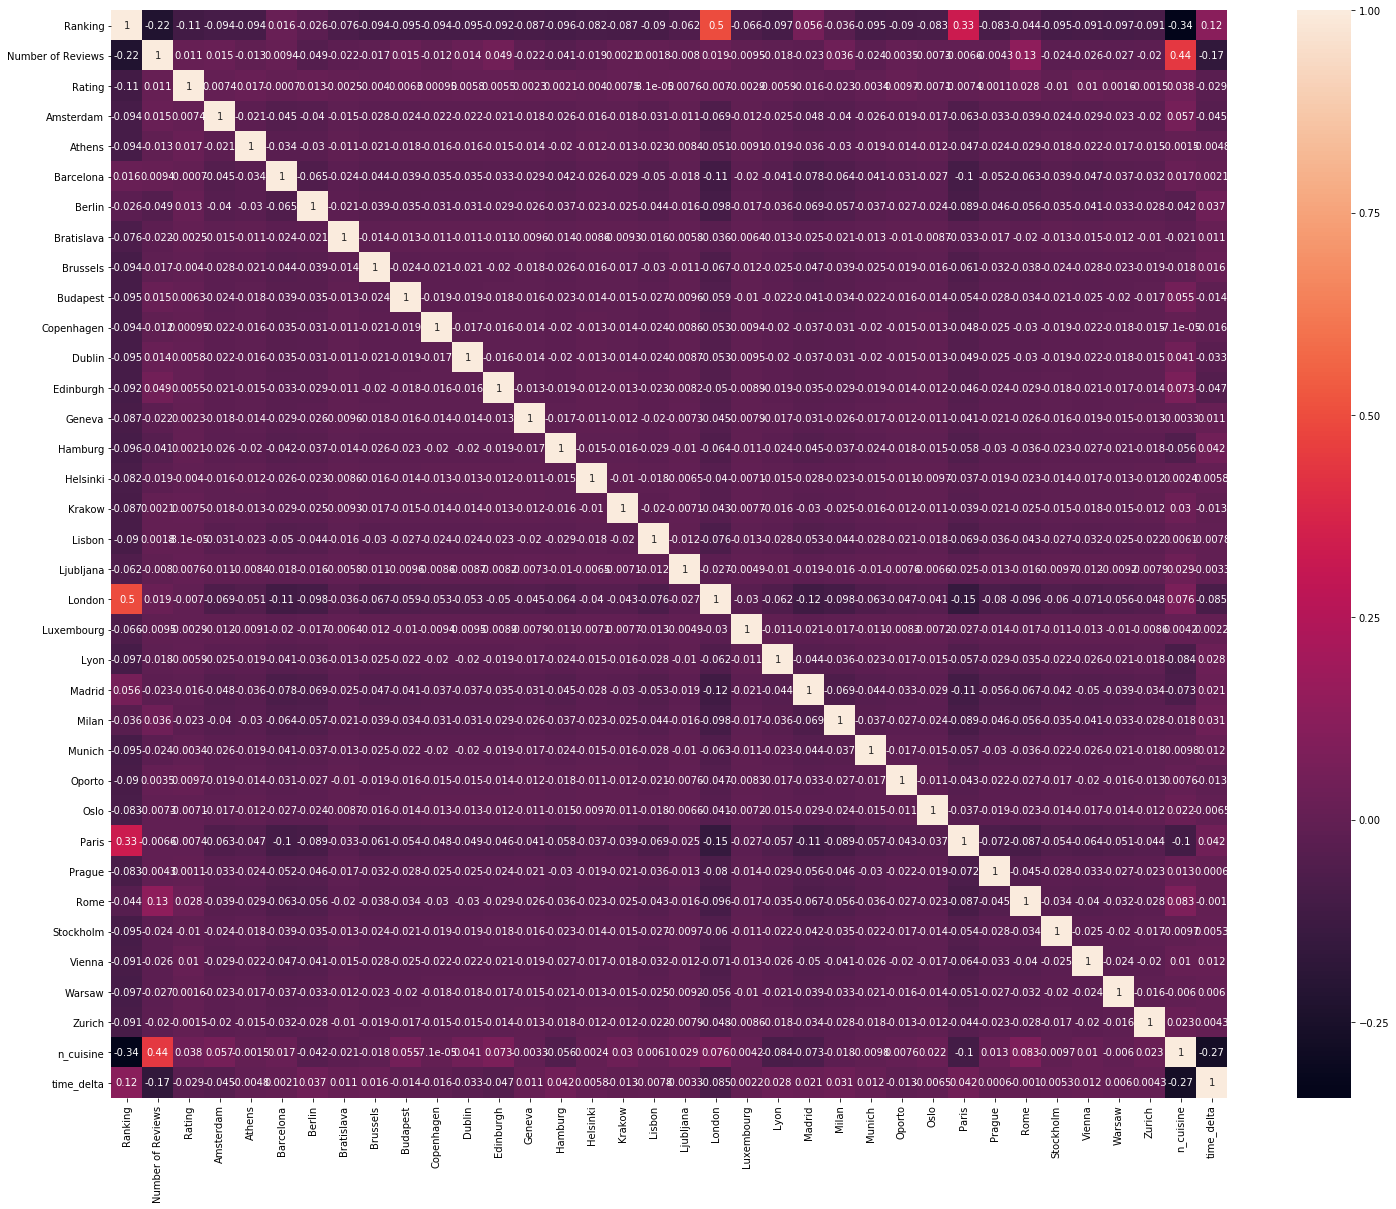

In [53]:
plt.rcParams['figure.figsize'] = (25,20)
sns.heatmap(data.drop(['sample', 'Price Range'], axis=1).corr(), annot=True)

Вообще благодаря визуализации в этом датасете можно узнать много интересных фактов, например:
* где больше Пицерий в Мадриде или Лондоне?
* в каком городе кухня ресторанов более разнообразна?

придумайте свои вопрос и найдите на него ответ в данных)

# Data Preprocessing
Теперь, для удобства и воспроизводимости кода, завернем всю обработку в одну большую функцию.

In [54]:
# на всякий случай, заново подгружаем данные
df_train = pd.read_csv(DATA_DIR+'/main_task.csv')
df_test = pd.read_csv(DATA_DIR+'/kaggle_task.csv')
df_train['sample'] = 1 # помечаем где у нас трейн
df_test['sample'] = 0 # помечаем где у нас тест
df_test['Rating'] = 0 # в тесте у нас нет значения Rating, мы его должны предсказать, по этому пока просто заполняем нулями

data = df_test.append(df_train, sort=False).reset_index(drop=True) # объединяем
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
Restaurant_id        50000 non-null object
City                 50000 non-null object
Cuisine Style        38410 non-null object
Ranking              50000 non-null float64
Price Range          32639 non-null object
Number of Reviews    46800 non-null float64
Reviews              49998 non-null object
URL_TA               50000 non-null object
ID_TA                50000 non-null object
sample               50000 non-null int64
Rating               50000 non-null float64
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


In [55]:
def chng_price(price):
    if price == '$':
        return 1    #'low'
    elif price == '$$ - $$$':
        return 2    #'medium'
    else:
        return 3    #'high'

def get_date(row):
    if len(row['Reviews Date']) == 2:
        return row['Reviews Date'][0], row['Reviews Date'][1]
    elif len(row['Reviews Date']) == 1:
        return row['Reviews Date'][0], np.nan
    else:
        return np.nan,np.nan

def preproc_data(df_input):
    '''includes several functions to pre-process the predictor data.'''
    
    df_output = df_input.copy()
    
    # ################### 1. Предобработка ############################################################## 
    # убираем не нужные для модели признаки
    df_output.drop(['Restaurant_id','ID_TA',], axis = 1, inplace=True)
    
    
    # ################### 2. NAN ############################################################## 
    # Далее заполняем пропуски, вы можете попробовать заполнением средним или средним по городу и тд...
    df_output['Number of Reviews'].fillna(df_output['Number of Reviews'].mode()[0], inplace=True)
    # тут ваш код по обработке NAN
    # ....
    df_output['Reviews'].fillna('unknown', inplace=True)
    df_output['Price Range'].fillna('$$ - $$$', inplace=True)
    df_output['Cuisine Style'] = df_output['Cuisine Style'].fillna('unknown')
    
    # ################### 3. Encoding ############################################################## 
    # для One-Hot Encoding в pandas есть готовая функция - get_dummies. Особенно радует параметр dummy_na
    df_output = pd.concat([df_output,pd.get_dummies(df_output['City'])],axis=1)
    # тут ваш код не Encoding фитчей
    # ....
    df_output['Price Range'] = df_output['Price Range'].apply(chng_price)
    
    
    # ################### 4. Feature Engineering ####################################################
    # тут ваш код не генерацию новых фитчей
    # ....
    df_output['Cuisine Style'] = df_output['Cuisine Style'].astype(str).apply(lambda L: L[1:-1])
    df_output['Cuisine Style'] = df_output['Cuisine Style'].str.split(',')
    df_output['Cuisine Style'] = df_output['Cuisine Style'].astype(str).str.strip()
    df_output['n_cuisine'] = df_output['Cuisine Style'].apply(len)
    
    
    pattern = re.compile('\'\d+\/\d+\/\d+\'?')
    df_output['Reviews Date'] = df_output['Reviews'].apply(pattern.findall)
    df_output['Reviews Date'] = df_output['Reviews Date'].apply(lambda x: sorted([pd.to_datetime(i).date() for i in x]))
    df_output[['date_1', 'date_2']] = df_output[['Reviews Date']].apply(get_date, axis=1, result_type='expand')
    df_output['time_delta'] = df_output.date_2 - df_output.date_1
    df_output['time_delta'].fillna(df_output['time_delta'].mean(), inplace=True)
    df_output['time_delta'] = df_output['time_delta'].astype('timedelta64[D]').astype(int)
    
    
    # ################### 5. Clean #################################################### 
    # убираем признаки которые еще не успели обработать, 
    # модель на признаках с dtypes "object" обучаться не будет, просто выберим их и удалим
    object_columns = [s for s in df_output.columns if df_output[s].dtypes == 'object']
    df_output.drop(object_columns, axis = 1, inplace=True)
    
    return df_output

>По хорошему, можно было бы перевести эту большую функцию в класс и разбить на подфункции (согласно ООП).

#### Запускаем и проверяем что получилось

In [56]:
df_preproc = preproc_data(data)
df_preproc.sample(10)

,Ranking,Price Range,Number of Reviews,sample,Rating,Amsterdam,Athens,Barcelona,Berlin,Bratislava,...,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,n_cuisine,time_delta
23741,7801.0,2,8.0,1,4.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,19,120
4310,3684.0,2,2.0,0,0.0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,9,142
2679,6458.0,2,2.0,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,9,17
912,1014.0,2,1044.0,0,0.0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,79,29
26344,2708.0,2,88.0,1,4.0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,52,29
46633,558.0,3,1019.0,1,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,131,24
20562,11054.0,2,55.0,1,3.5,0,0,0,0,0,...,0,1,0,0,0,0,0,0,12,205
21045,81.0,2,307.0,1,4.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,94,114
33529,5805.0,3,28.0,1,4.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,104,59
26226,11925.0,2,3.0,1,4.5,0,0,0,0,0,...,0,0,0,0,0,0,0,0,13,149


In [57]:
df_preproc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 38 columns):
Ranking              50000 non-null float64
Price Range          50000 non-null int64
Number of Reviews    50000 non-null float64
sample               50000 non-null int64
Rating               50000 non-null float64
Amsterdam            50000 non-null uint8
Athens               50000 non-null uint8
Barcelona            50000 non-null uint8
Berlin               50000 non-null uint8
Bratislava           50000 non-null uint8
Brussels             50000 non-null uint8
Budapest             50000 non-null uint8
Copenhagen           50000 non-null uint8
Dublin               50000 non-null uint8
Edinburgh            50000 non-null uint8
Geneva               50000 non-null uint8
Hamburg              50000 non-null uint8
Helsinki             50000 non-null uint8
Krakow               50000 non-null uint8
Lisbon               50000 non-null uint8
Ljubljana            50000 non-null uint8
Lon

In [58]:
# Теперь выделим тестовую часть
train_data = df_preproc.query('sample == 1').drop(['sample'], axis=1)
test_data = df_preproc.query('sample == 0').drop(['sample'], axis=1)

y = train_data.Rating.values            # наш таргет
X = train_data.drop(['Rating'], axis=1)

**Перед тем как отправлять наши данные на обучение, разделим данные на еще один тест и трейн, для валидации. 
Это поможет нам проверить, как хорошо наша модель работает, до отправки submissiona на kaggle.**

In [59]:
# Воспользуемся специальной функцие train_test_split для разбивки тестовых данных
# выделим 20% данных на валидацию (параметр test_size)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=RANDOM_SEED)

In [60]:
# проверяем
test_data.shape, train_data.shape, X.shape, X_train.shape, X_test.shape

((10000, 37), (40000, 37), (40000, 36), (32000, 36), (8000, 36))

# Model 
Сам ML

In [61]:
# Импортируем необходимые библиотеки:
from sklearn.ensemble import RandomForestRegressor # инструмент для создания и обучения модели
from sklearn import metrics # инструменты для оценки точности модели

In [62]:
# Создаём модель (НАСТРОЙКИ НЕ ТРОГАЕМ)
model = RandomForestRegressor(n_estimators=100, verbose=1, n_jobs=-1, random_state=RANDOM_SEED)

In [63]:
# Обучаем модель на тестовом наборе данных
model.fit(X_train, y_train)

# Используем обученную модель для предсказания рейтинга ресторанов в тестовой выборке.
# Предсказанные значения записываем в переменную y_pred
y_pred = model.predict(X_test)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    6.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [64]:
# Сравниваем предсказанные значения (y_pred) с реальными (y_test), и смотрим насколько они в среднем отличаются
# Метрика называется Mean Absolute Error (MAE) и показывает среднее отклонение предсказанных значений от фактических.
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))

MAE: 0.209785


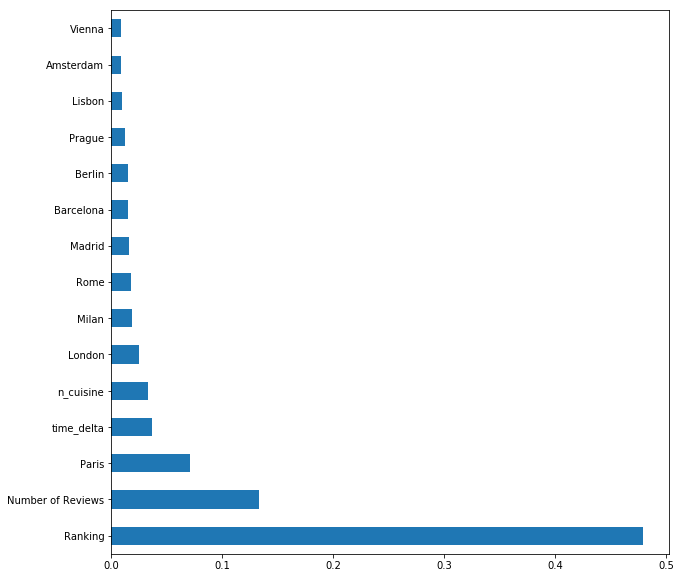

In [65]:
# в RandomForestRegressor есть возможность вывести самые важные признаки для модели
plt.rcParams['figure.figsize'] = (10,10)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')

# Submission
Если все устраевает - готовим Submission на кагл

In [66]:
test_data.sample(10)

,Ranking,Price Range,Number of Reviews,Rating,Amsterdam,Athens,Barcelona,Berlin,Bratislava,Brussels,...,Oslo,Paris,Prague,Rome,Stockholm,Vienna,Warsaw,Zurich,n_cuisine,time_delta
7344,53.0,2,878.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,100,17
5435,3114.0,2,2.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,29,142
9470,1086.0,1,110.0,0.0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,98,72
1849,5160.0,1,23.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,42,48
7990,60.0,2,344.0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,155,2
3350,2522.0,2,85.0,0.0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,58,49
8229,6797.0,1,16.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,52,100
2052,5323.0,2,471.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,123,9
5088,251.0,2,645.0,0.0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,105,10
9192,449.0,2,47.0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,29,260


In [67]:
test_data = test_data.drop(['Rating'], axis=1)

In [68]:
sample_submission

,Restaurant_id,Rating
0,id_0,2.0
1,id_1,2.5
2,id_2,4.0
3,id_3,1.0
4,id_4,4.0
...,...,...
9995,id_9995,3.0
9996,id_9996,1.5
9997,id_9997,4.5
9998,id_9998,1.0


In [69]:
predict_submission = model.predict(test_data)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.1s finished


In [70]:
# округляем предсказания модели до 0.5
predict_submission = (predict_submission * 2).round() / 2

In [71]:
predict_submission

array([3. , 4.5, 4.5, ..., 3. , 4.5, 4. ])

In [72]:
sample_submission['Rating'] = predict_submission
sample_submission.to_csv('submission.csv', index=False)
sample_submission.head(10)

,Restaurant_id,Rating
0,id_0,3.0
1,id_1,4.5
2,id_2,4.5
3,id_3,4.5
4,id_4,4.5
5,id_5,4.5
6,id_6,1.5
7,id_7,2.5
8,id_8,4.0
9,id_9,4.5


# What's next?
Или что делать, чтоб улучшить результат:
* Обработать оставшиеся признаки в понятный для машины формат
* Посмотреть, что еще можно извлечь из признаков
* Сгенерировать новые признаки
* Подгрузить дополнительные данные, например: по населению или благосостоянию городов
* Подобрать состав признаков

В общем, процесс творческий и весьма увлекательный! Удачи в соревновании!